In [1]:
# all imports
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import seaborn as sns
import factor_analyzer.factor_analyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Socrates_Fixed.csv')
df.head()

,ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0,1,-1,0,1,1,-2,1,-1,1,...,1,1,0,1,-1,-1,1,-1,-1,0
1,1,1,-1,1,1,1,0,1,1,1,...,-1,-1,1,0,1,1,1,0,-1,1
2,2,2,0,2,-2,1,-2,2,-2,-1,...,1,1,2,2,-2,-1,1,2,-2,2
3,3,1,0,1,1,0,-2,1,0,2,...,0,-2,-1,1,-2,1,-1,0,-2,1
4,4,-2,2,1,1,-1,2,0,1,1,...,-2,-2,1,0,-1,1,-2,-1,0,-1


In [3]:
df["E_SELF"] = (df["1"] - df["6"]) / 2.0
df["E_SOCR"] = (df["11"] - df["16"]) / 2.0
df["A_SELF"] = (df["7"] - df["2"]) / 2.0
df["A_SOCR"] = (df["17"] - df["12"]) / 2.0
df["C_SELF"] = (df["3"] - df["8"]) / 2.0
df["C_SOCR"] = (df["13"] - df["18"]) / 2.0
df["S_SELF"] = (df["9"] - df["4"]) / 2.0
df["S_SOCR"] = (df["19"] - df["14"]) / 2.0
df["O_SELF"] = (df["5"] - df["10"]) / 2.0
df["O_SOCR"] = (df["15"] - df["20"]) / 2.0

df["EASE"] = (df["21"] - df["22"] - df["31"]) / 3.0
df["REAL"] = (df["23"] + df["24"] + df["26"] + df["29"]) / 4.0
df["ANSQU"] = (df["25"] - df["27"] - df["28"]) / 3.0
df["IMMER"] = (df["30"] + df["32"]) / 2.0

df.head()

,ID,1,2,3,4,5,6,7,8,9,...,C_SELF,C_SOCR,S_SELF,S_SOCR,O_SELF,O_SOCR,EASE,REAL,ANSQU,IMMER
0,0,1,-1,0,1,1,-2,1,-1,1,...,0.5,1.0,0.0,1.5,1.0,1.0,0.333333,1.00,0.666667,-0.5
1,1,1,-1,1,1,1,0,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.000000,-0.25,-0.333333,0.5
2,2,2,0,2,-2,1,-2,2,-2,-1,...,2.0,2.0,0.5,-0.5,1.5,0.5,0.666667,1.25,1.666667,2.0
3,3,1,0,1,1,0,-2,1,0,2,...,0.5,1.0,0.5,1.5,0.5,1.5,0.666667,-0.50,0.000000,0.5
4,4,-2,2,1,1,-1,2,0,1,1,...,0.0,1.5,0.0,0.5,-1.5,-0.5,0.333333,-1.50,0.333333,-1.0


E:\Anaconda\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


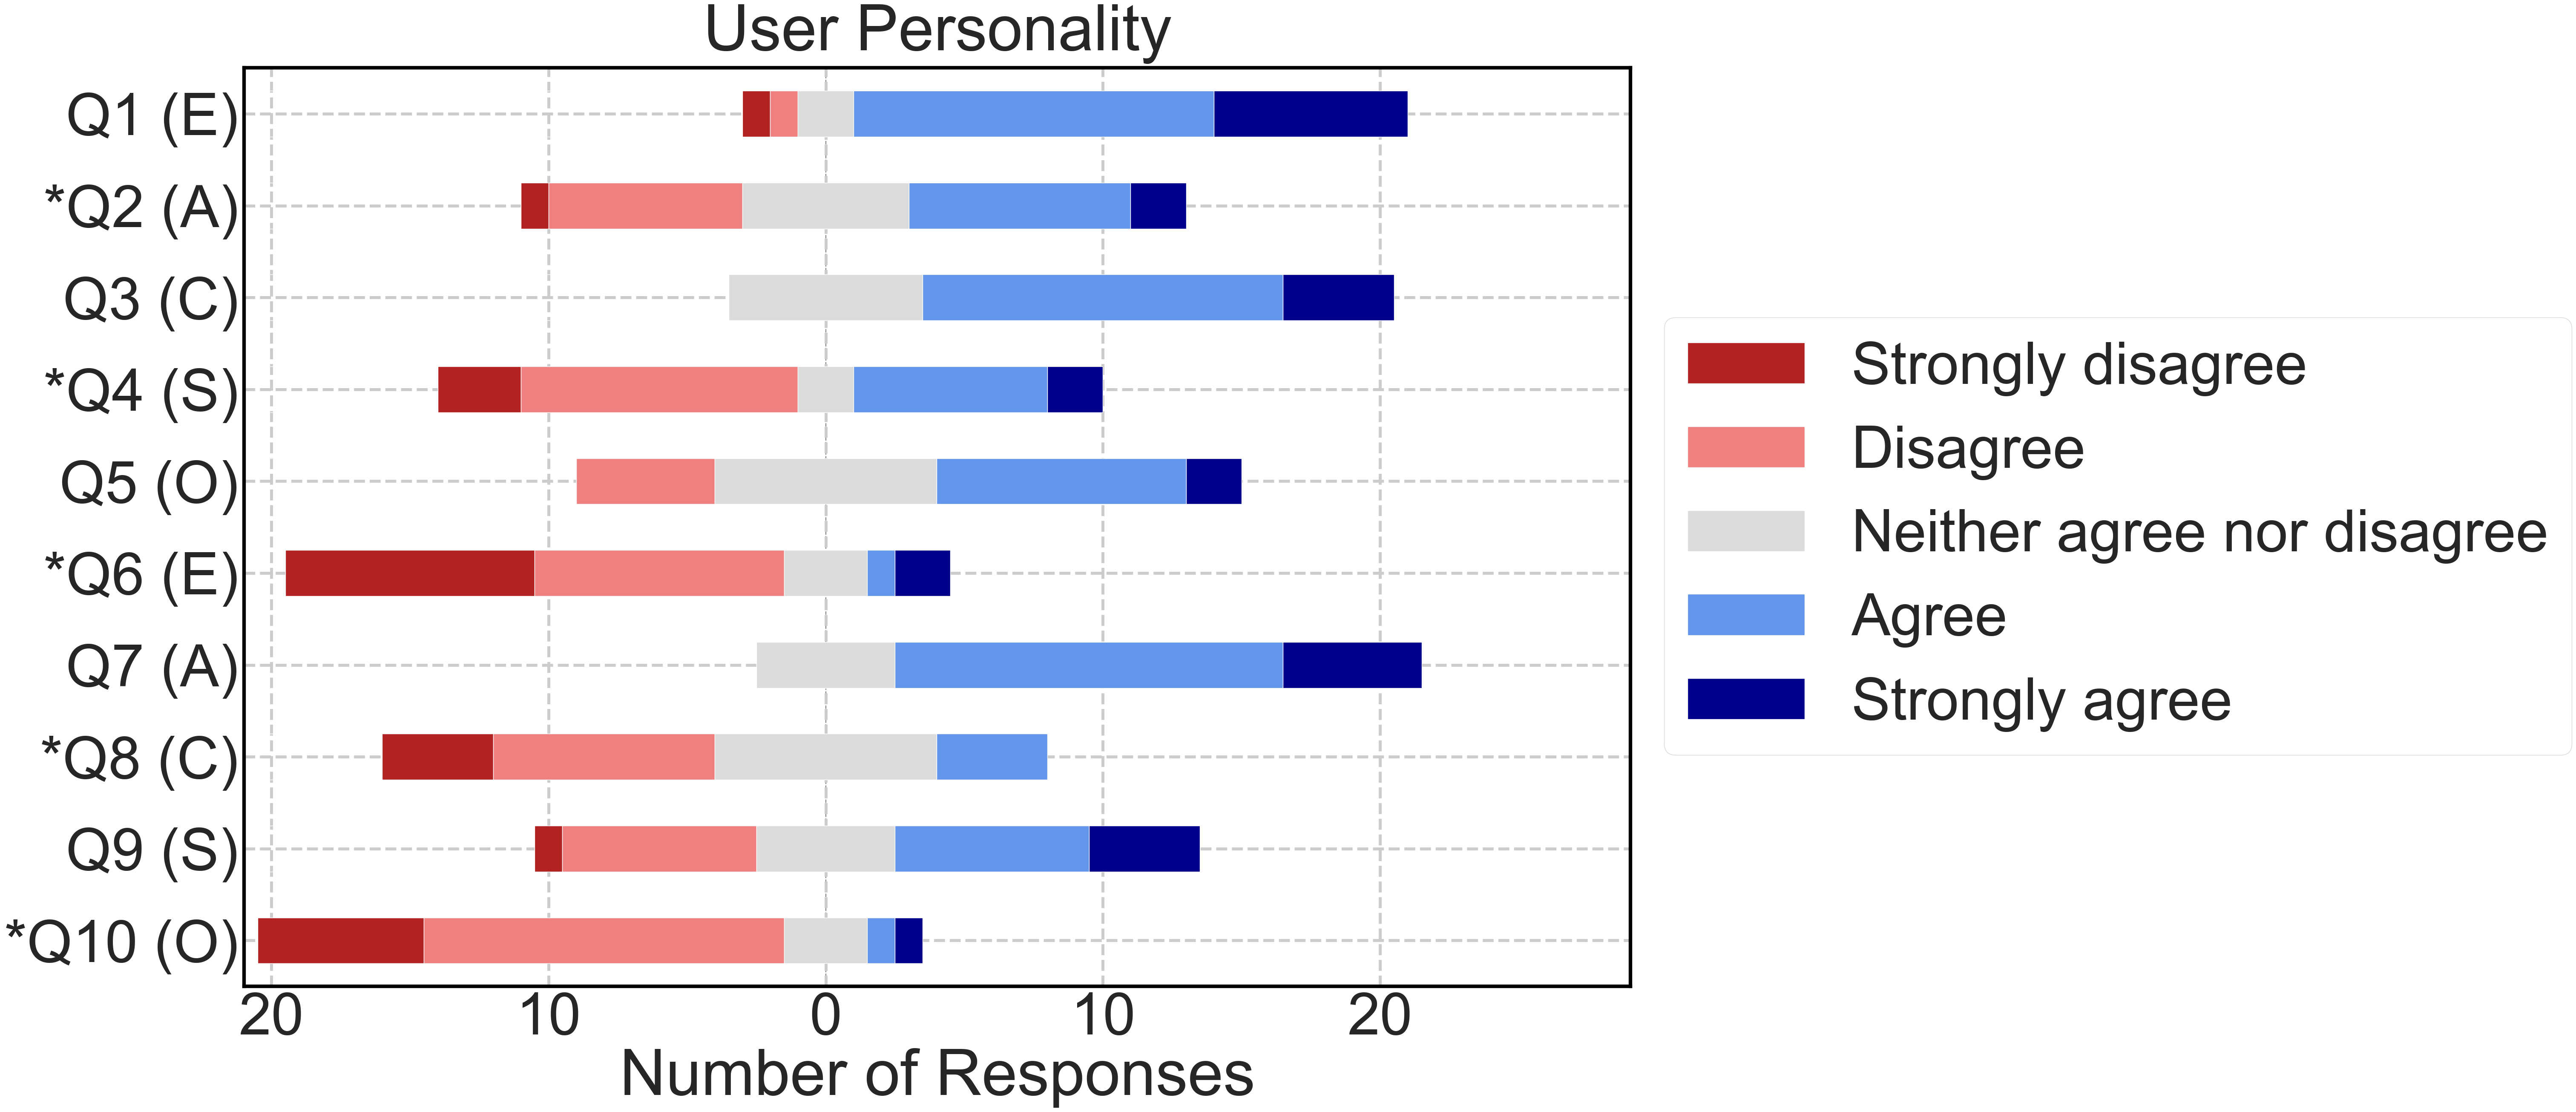

In [9]:
import plot_likert

dict_likert = {
    -2:"Strongly disagree",
    -1:"Disagree",
    0:"Neither agree nor disagree",
    1:"Agree",
    2:"Strongly agree"
}

dict_reverse_likert = {
    2:"Strongly disagree",
    1:"Disagree",
    0:"Neither agree nor disagree",
    -1:"Agree",
    -2:"Strongly agree"
}

df["E_SELF"] = (df["1"] - df["6"]) / 2.0
df["E_SOCR"] = (df["11"] - df["16"]) / 2.0
df["A_SELF"] = (df["7"] - df["2"]) / 2.0
df["A_SOCR"] = (df["17"] - df["12"]) / 2.0
df["C_SELF"] = (df["3"] - df["8"]) / 2.0
df["C_SOCR"] = (df["13"] - df["18"]) / 2.0
df["S_SELF"] = (df["9"] - df["4"]) / 2.0
df["S_SOCR"] = (df["19"] - df["14"]) / 2.0
df["O_SELF"] = (df["5"] - df["10"]) / 2.0
df["O_SOCR"] = (df["15"] - df["20"]) / 2.0

df["EASE"] = (df["21"] - df["22"] - df["31"]) / 3.0
df["REAL"] = (df["23"] + df["24"] + df["26"] + df["29"]) / 4.0
df["ANSQU"] = (df["25"] - df["27"] - df["28"]) / 3.0
df["IMMER"] = (df["30"] + df["32"]) / 2.0

def get_map(i,j):
    return pd.concat([df[str(i)].map(dict_likert), df[str(j)].map(dict_reverse_likert)])

def get_map_ind(i):
    return df[str(i)].map(dict_likert)

# dfp = pd.concat([get_map(1,6), get_map(11,16), get_map(7,2),  get_map(17,12), get_map(3,8), get_map(13,18)], axis=1)
# dfp = dfp.rename(columns={0: 'E_Self', 1: 'E_Socr', 2: 'A_Self', 3: 'A_Socr', 4: 'C_Self', 5: 'C_Socr'})

# display(dfp)

dfp = []
dfp_map = {}
for i in range(10):
    dfp.append(get_map_ind(i+1))
    # dfp_map[str(i+1)] = "Q" + str(i+1)

dfp_map = {"1":'Q1 (E) ', "2":'*Q2 (A)', "3":'Q3 (C)', "4":'*Q4 (S)', "5":'Q5 (O)',"6":'*Q6 (E)', "7":'Q7 (A)', "8":'*Q8 (C)', "9":'Q9 (S)', "10":'*Q10 (O)'}

dfp = pd.concat(dfp, axis=1)
dfp = dfp.rename(columns=dfp_map)

ax = plot_likert.plot_likert(dfp, plot_likert.scales.agree, plot_percentage=False)
ax.set_title("User Personality", pad=30)

plt.grid(linestyle="--", linewidth = 5)
plt.setp(ax.spines.values(), lw=6, color='black');
# plt.xticks(rotation=90)
# plt.show()

h, l = ax.get_legend_handles_labels()
plt.legend(h, l,  loc='upper right',bbox_to_anchor=(1.7,0.76))

# plt.legend((ax.get_legend_handles_labels()), loc='upper left')

plt.savefig("likert_self.pdf", transparent=True, dpi=400, bbox_inches='tight')
# ax.legend(labels=["Strong Disagree"])

E:\Anaconda\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


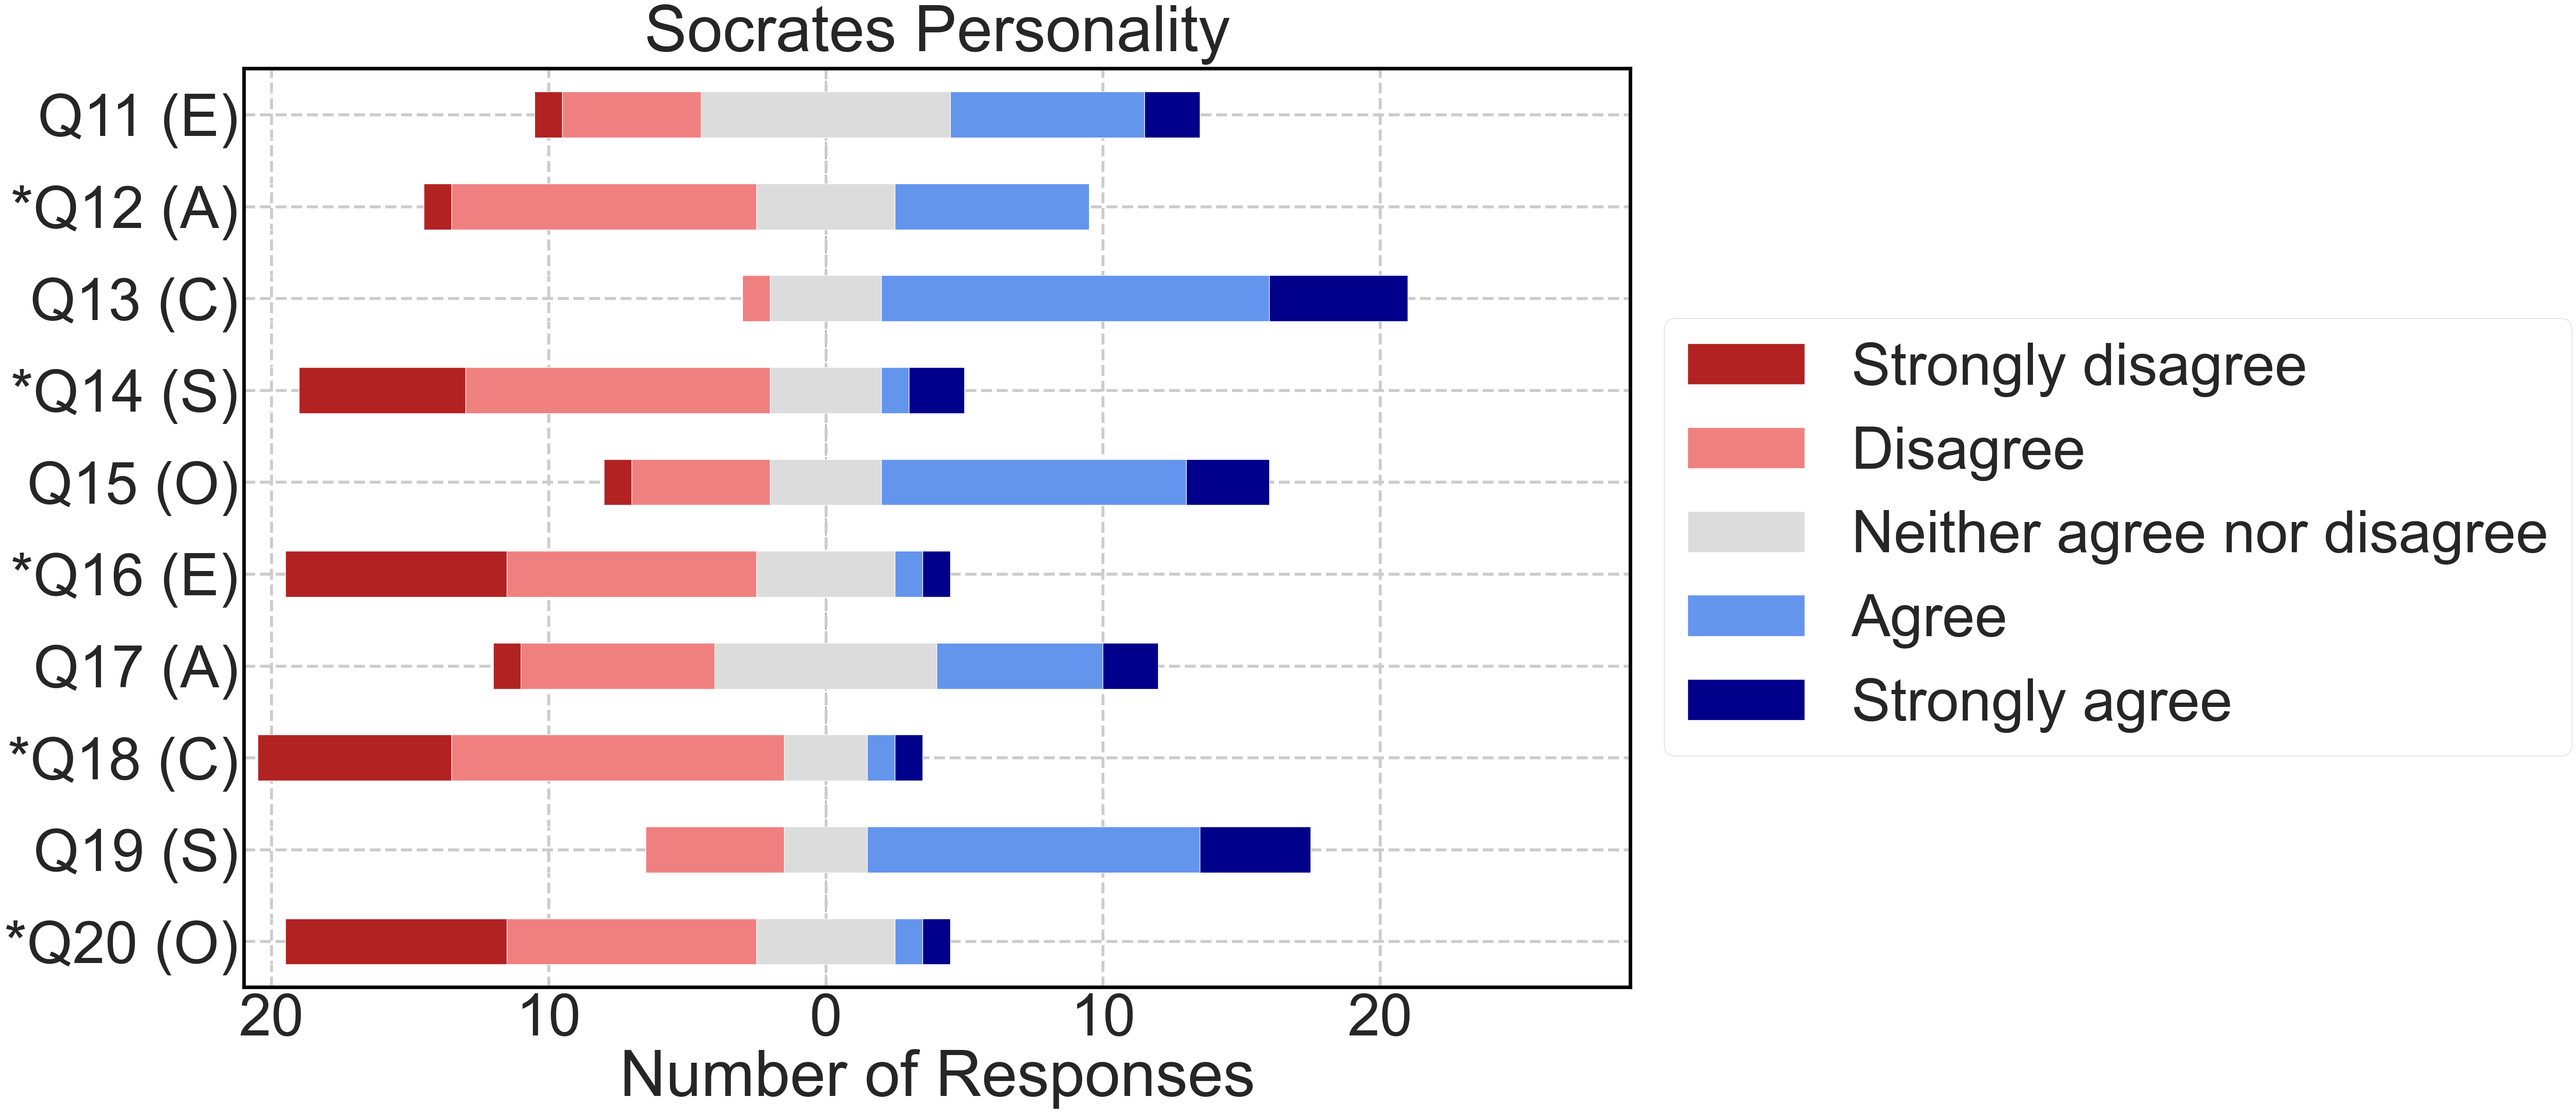

In [192]:
dfp = []
dfp_map = {}
for i in range(10,20):
    dfp.append(get_map_ind(i+1))
    # dfp_map[str(i+1)] = "Q" + str(i+1)

dfp_map = {"11":'Q11 (E) ', "12":'*Q12 (A)', "13":'Q13 (C)', "14":'*Q14 (S)', "15":'Q15 (O)',"16":'*Q16 (E)', "17":'Q17 (A)', "18":'*Q18 (C)', "19":'Q19 (S)', "20":'*Q20 (O)'}

dfp = pd.concat(dfp, axis=1)
dfp = dfp.rename(columns=dfp_map)

ax = plot_likert.plot_likert(dfp, plot_likert.scales.agree, plot_percentage=False)
ax.set_title("Socrates Personality", pad=30)

plt.grid(linestyle="--", linewidth = 5)
plt.setp(ax.spines.values(), lw=6, color='black');
# plt.xticks(rotation=90)
# plt.show()

h, l = ax.get_legend_handles_labels()
plt.legend(h, l,  loc='upper right',bbox_to_anchor=(1.7,0.76))

# plt.legend((ax.get_legend_handles_labels()), loc='upper left')

plt.savefig("likert_socrates.pdf", transparent=True, dpi=400, bbox_inches='tight')

E:\Anaconda\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


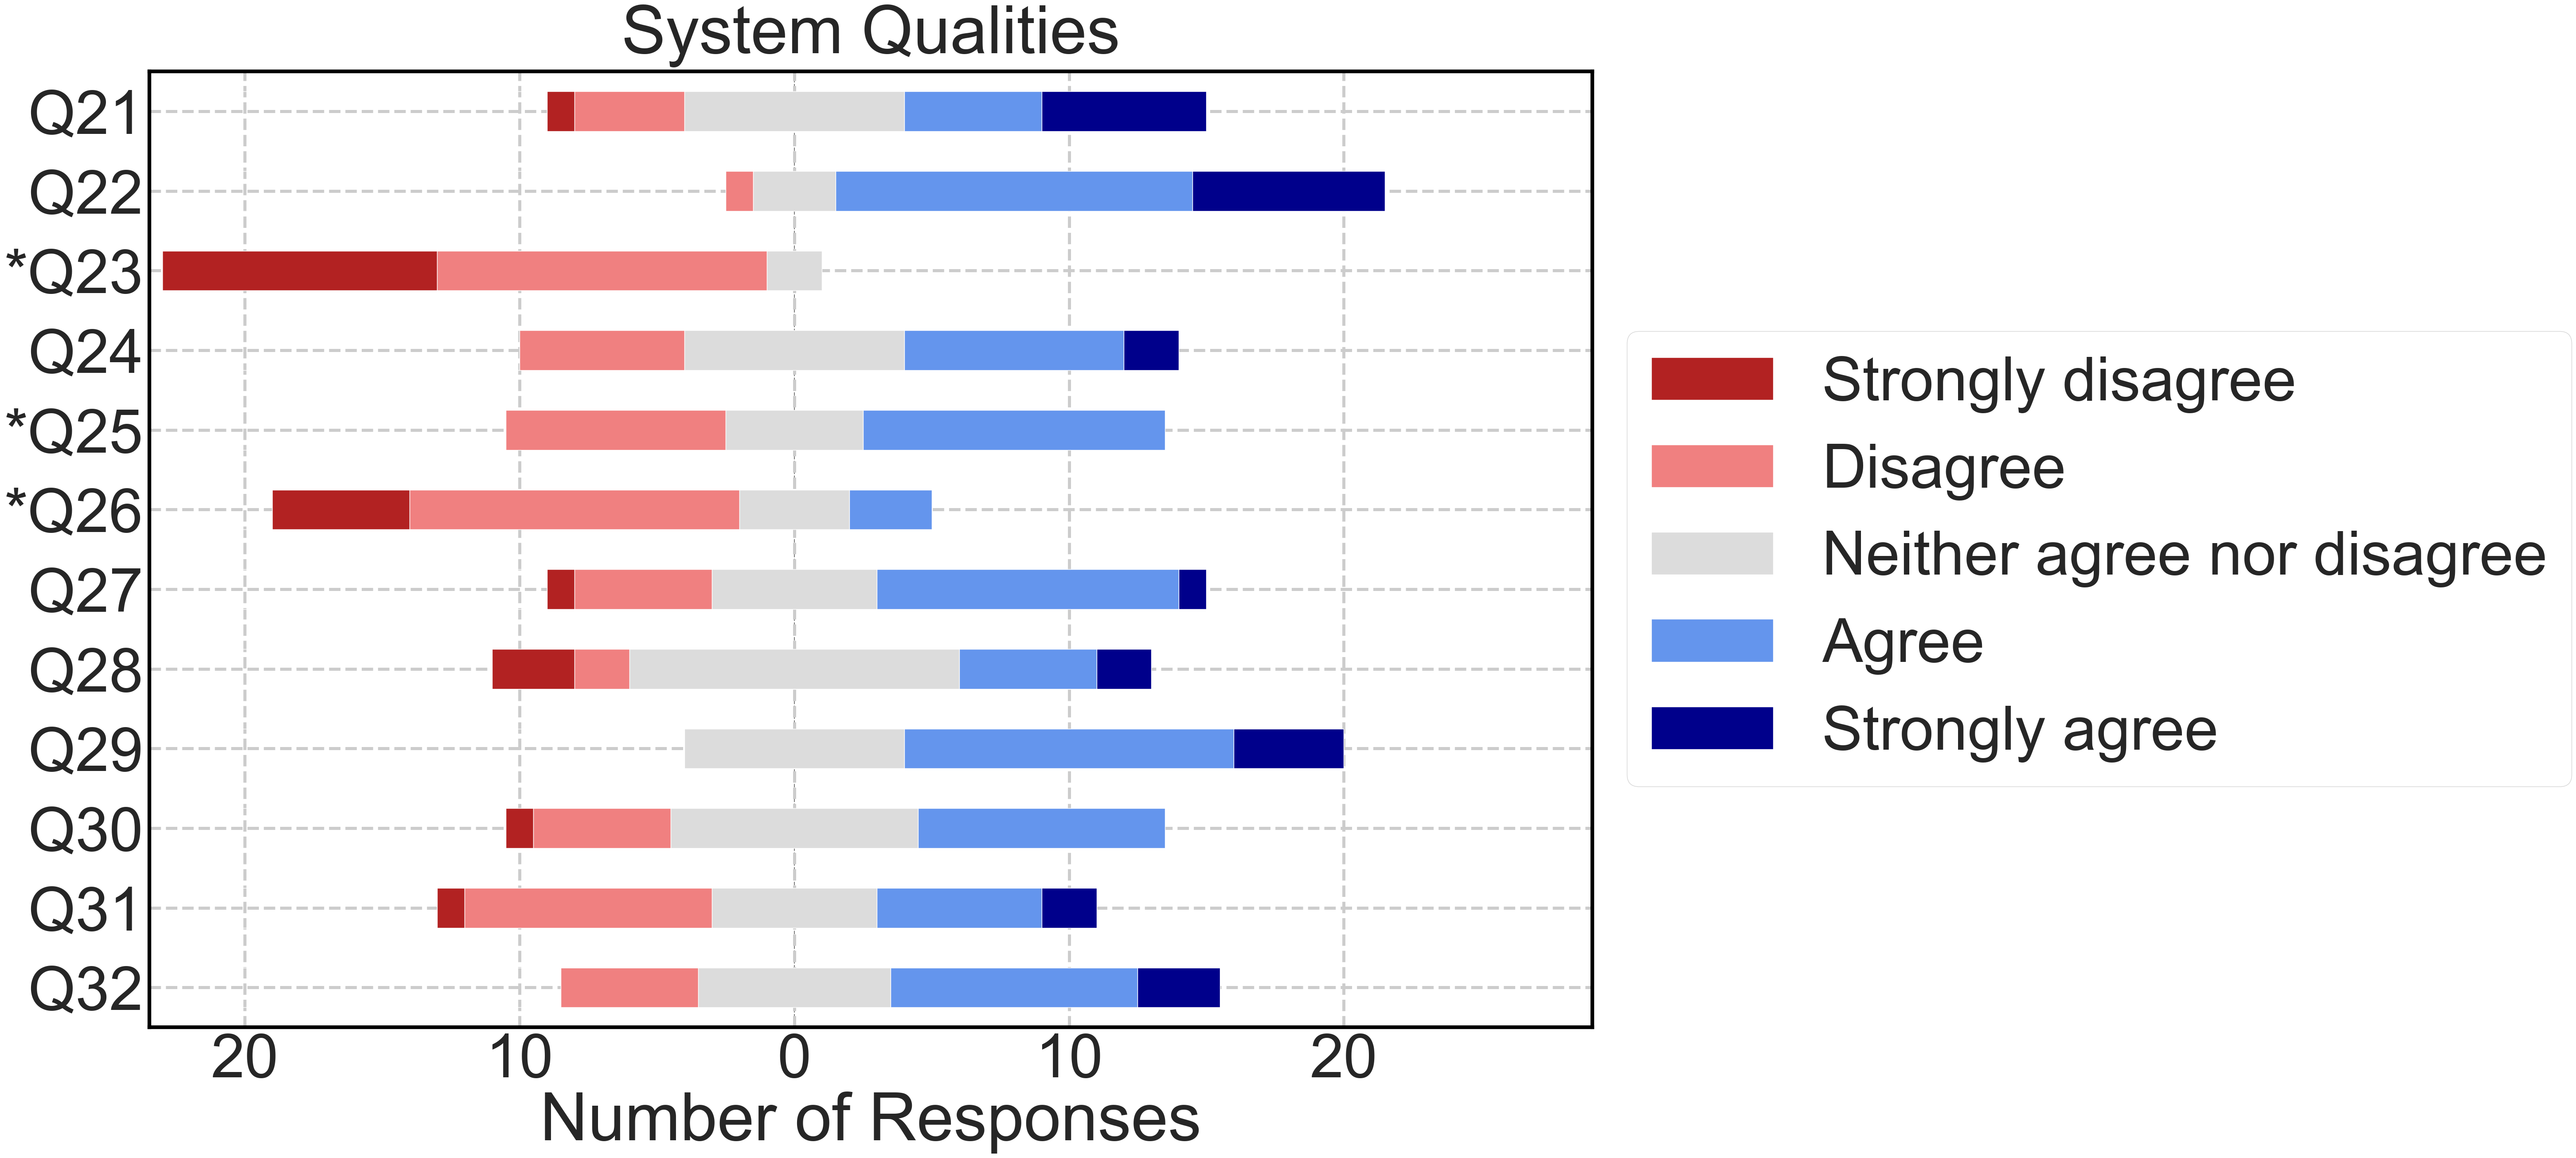

In [236]:
# df["EASE"] = (df["21"] - df["22"] - df["31"]) / 3.0
# df["REAL"] = (df["23"] + df["24"] + df["26"] + df["29"]) / 4.0
# df["ANSQU"] = (df["25"] - df["27"] - df["28"]) / 3.0
# df["IMMER"] = (df["30"] + df["32"]) / 2.0

dfp = []

dfp.append(get_map_ind(22))
dfp.append(get_map_ind(21))
dfp.append(get_map_ind(31))
dfp.append(get_map_ind(25))
dfp.append(get_map_ind(28))
dfp.append(get_map_ind(27))
dfp.append(get_map_ind(23))
dfp.append(get_map_ind(24))
dfp.append(get_map_ind(26))
dfp.append(get_map_ind(29))
dfp.append(get_map_ind(30))
dfp.append(get_map_ind(32))

# dfp = []
# dfp_map = {}
# for i in range(10,20):
#     dfp.append(get_map_ind(i+1))
#     # dfp_map[str(i+1)] = "Q" + str(i+1)

dfp_map = {"22":"Q21","21":"Q22","31":"*Q23","25":"Q24","28":"*Q25","27":"*Q26","23":"Q27","24":"Q28","26":"Q29","29":"Q30","30":"Q31","32":"Q32"}

dfp = pd.concat(dfp, axis=1)
dfp = dfp.rename(columns=dfp_map)

ax = plot_likert.plot_likert(dfp, plot_likert.scales.agree, plot_percentage=False)
ax.set_title("System Qualities", pad=30)

plt.grid(linestyle="--", linewidth = 5)
plt.setp(ax.spines.values(), lw=6, color='black');
# plt.xticks(rotation=90)
# plt.show()

h, l = ax.get_legend_handles_labels()
plt.legend(h, l,  loc='upper right',bbox_to_anchor=(1.7,0.76))

# plt.legend((ax.get_legend_handles_labels()), loc='upper left')

plt.savefig("likert_system.pdf", transparent=True, dpi=400, bbox_inches='tight')

C:\Users\Sina-\AppData\Local\Temp\ipykernel_3064\3096071059.py:9: UserWarning: The palette list has more values (20) than needed (14), which may not be intended.
  ax = sns.boxplot(x='value', y='variable', hue="variable", palette=sns.color_palette('tab20'), data=df_melt,
C:\Users\Sina-\AppData\Local\Temp\ipykernel_3064\3096071059.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["$U_O$","$U_C$","$U_E$","$U_A$","$U_S$","$S_O$","$S_C$","$S_E$","$S_A$","$S_S$", "$E$", "$Q$", "$R$", "$I$"])
C:\Users\Sina-\AppData\Local\Temp\ipykernel_3064\3096071059.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels, ha='left')


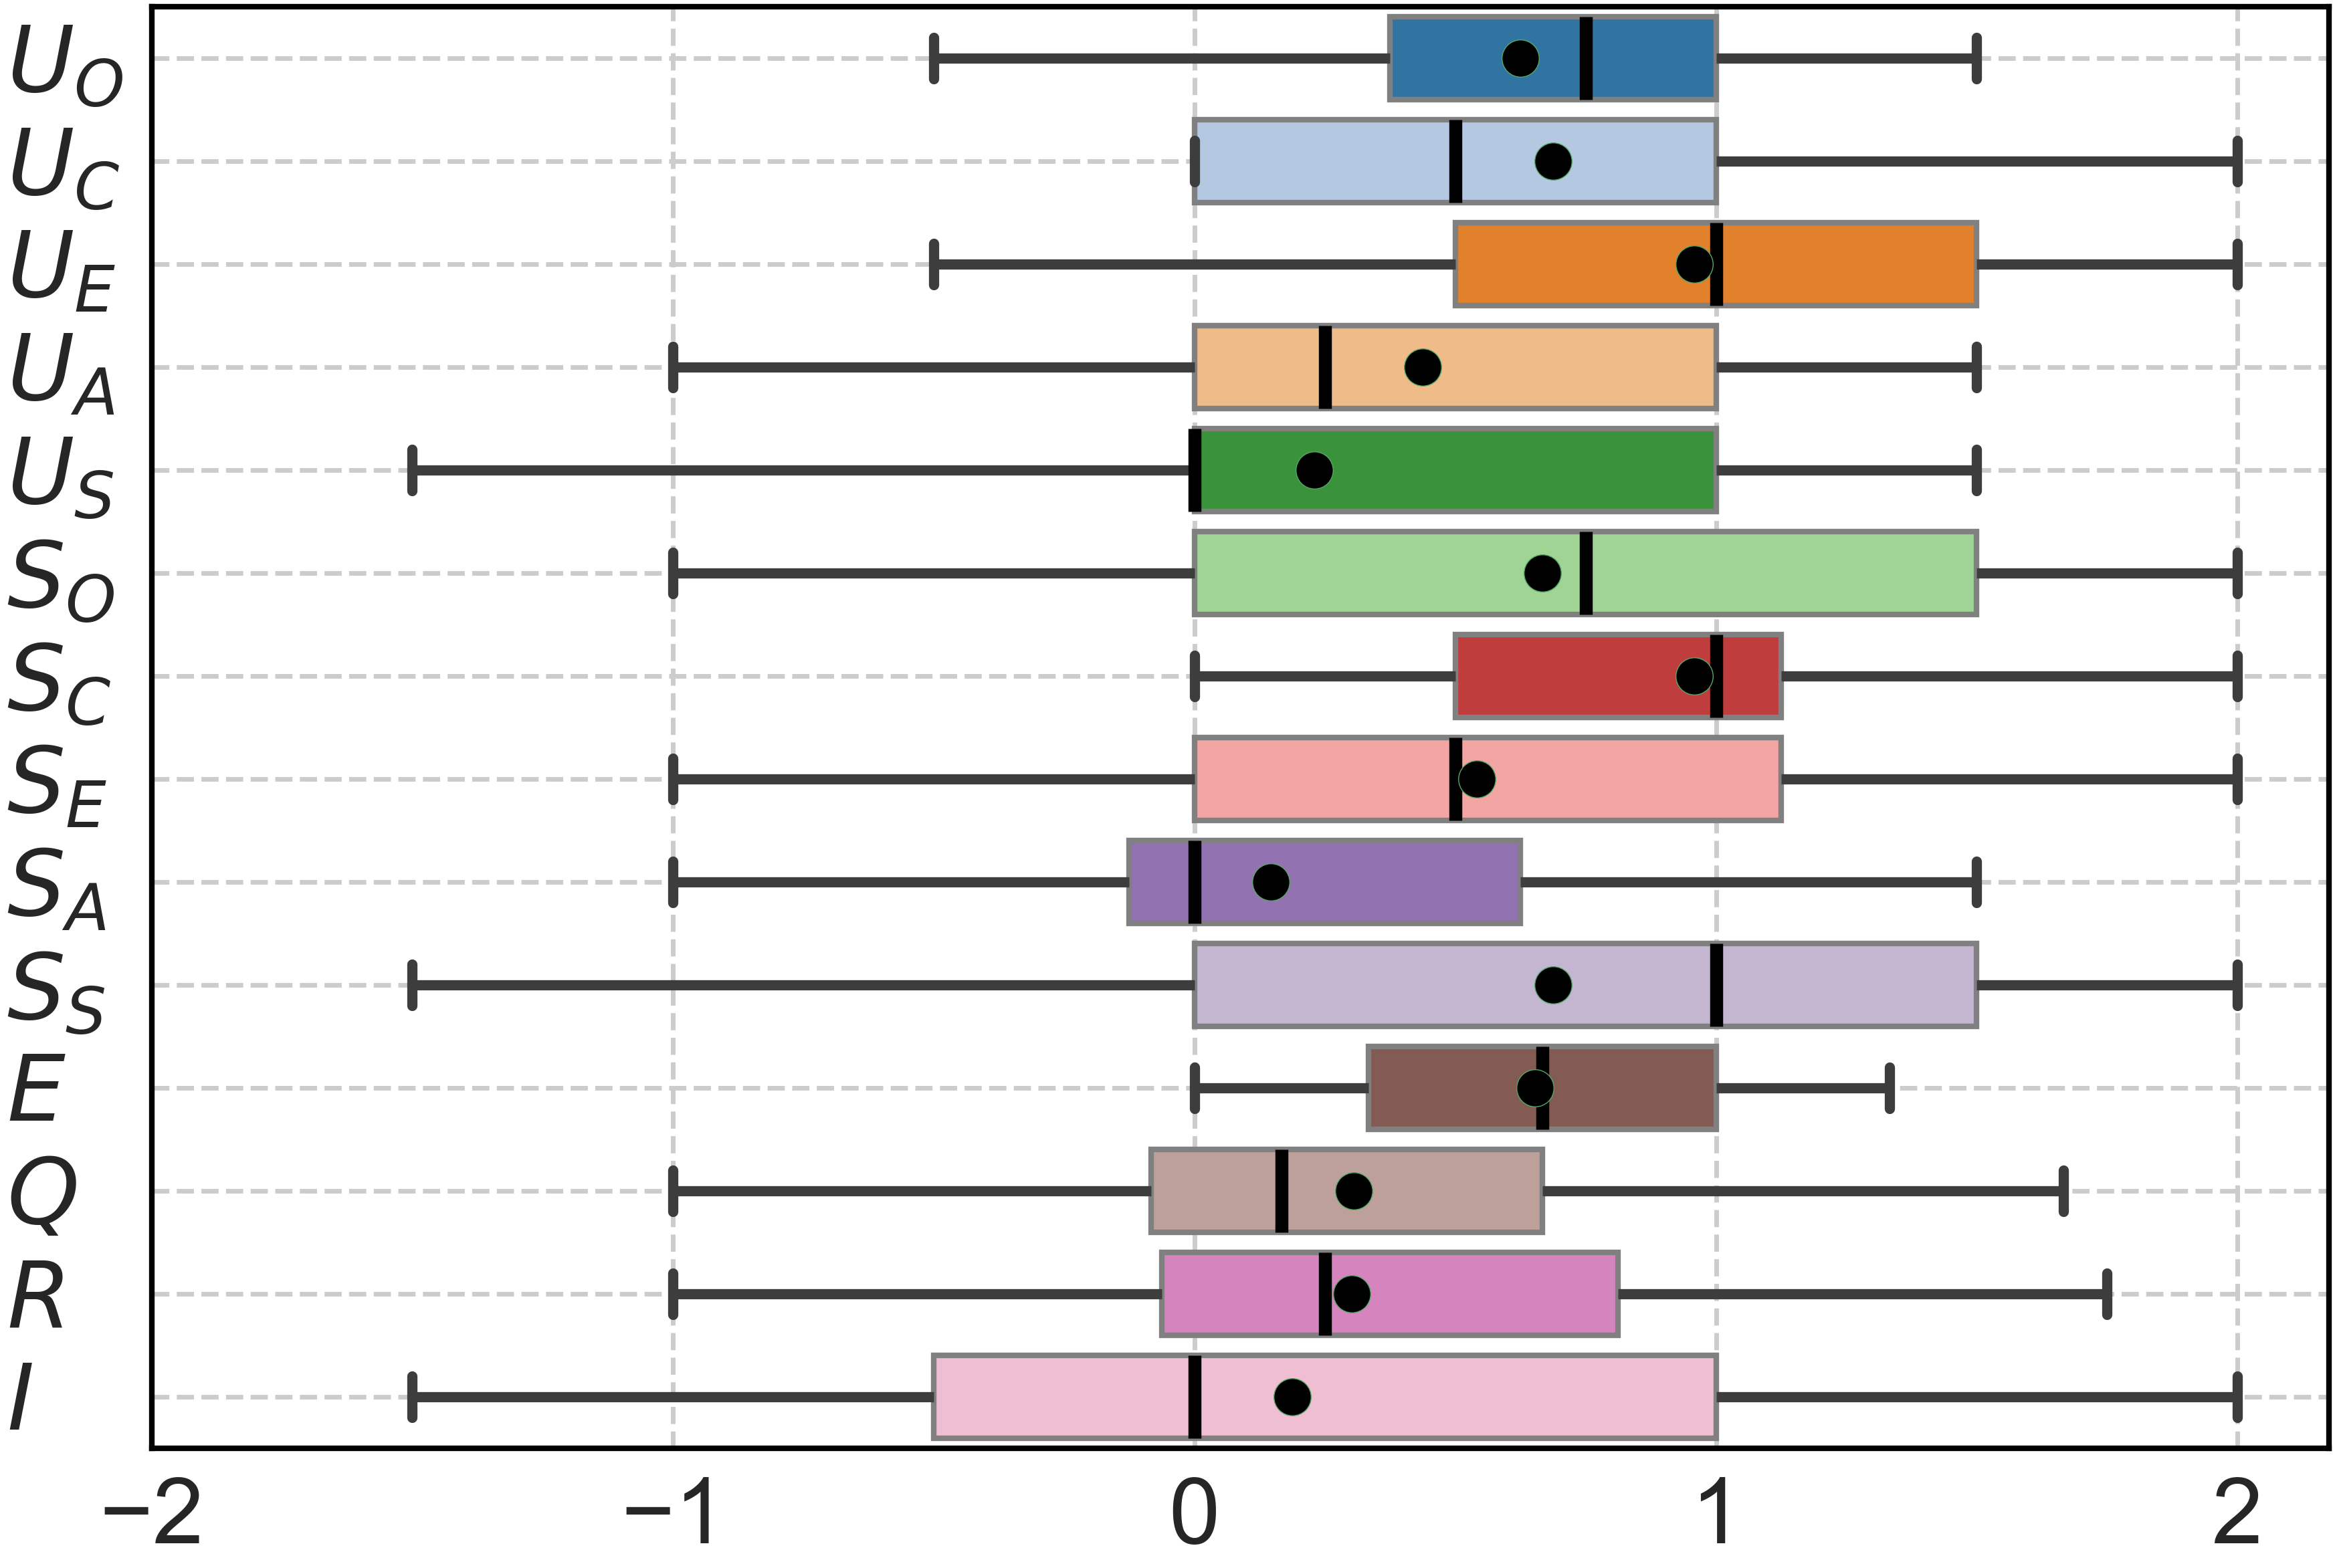

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_melt = pd.melt(df.reset_index(), id_vars=['ID'], value_vars=["O_SELF","C_SELF","E_SELF","A_SELF","S_SELF","O_SOCR","C_SOCR","E_SOCR","A_SOCR","S_SOCR","EASE", "ANSQU" ,"REAL",'IMMER'])
sns.set(rc={'figure.figsize':(42,28)})
sns.set(font_scale = 9)
sns.set_style("whitegrid")
ax = sns.boxplot(x='value', y='variable', hue="variable", palette=sns.color_palette('tab20'), data=df_melt,
                 linewidth = 11, color='black', showfliers = False, showmeans=True, meanprops={"marker":"o","markerfacecolor":"black", "markersize":"40"},
                 medianprops=dict(color='black', alpha=1, linewidth = 14),boxprops=dict(edgecolor='gray', linewidth = 6))
ax.set(xlabel='',ylabel='')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticklabels(["$U_O$","$U_C$","$U_E$","$U_A$","$U_S$","$S_O$","$S_C$","$S_E$","$S_A$","$S_S$", "$E$", "$Q$", "$R$", "$I$"])

labels = ["$U_O$","$U_C$","$U_E$","$U_A$","$U_S$","$S_O$","$S_C$","$S_E$","$S_A$","$S_S$", "$E$", "$Q$", "$R$", "$I$"]
ax.tick_params(axis='both', which='major', pad=25)

ax.tick_params(axis='y', pad=150)
ax.set_yticklabels(labels, ha='left')

# for i, yi in enumerate(y):
#     ax.text(-2, yi, labels[i], horizontalalignment='left', verticalalignment='center')

plt.legend([],[], frameon=False)
plt.grid(linestyle="--", linewidth = 5)
plt.setp(ax.spines.values(), lw=6, color='black');
# plt.xticks(rotation=90)
# plt.show()

plt.savefig("socrates_figure.pdf", transparent=True, dpi=400, bbox_inches='tight')

In [37]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

vars1=["O_SELF","C_SELF","E_SELF","A_SELF","S_SELF"]
vars2=["O_SOCR","C_SOCR","E_SOCR","A_SOCR","S_SOCR","EASE", "ANSQU" ,"REAL",'IMMER']

heads = ["$\\mathbf{S_O}$", "$\\mathbf{S_C}$", "$\\mathbf{S_E}$", "$\\mathbf{S_A}$", "$\\mathbf{S_S}$", "$\\mathbf{E}$", "$\\mathbf{Q}$", "$\\mathbf{R}$", "$\\mathbf{I}$"]

print(scipy.stats.pearsonr(df["O_SELF"], df["O_SELF"]))

# $\mathbf{S_O}$ & $.213$ &  $.219$ &  $.468$* &  $.245$ &  $-.033$ \\ \hline
# $\mathbf{S_C}$ & $.007$ &  $.337$ &  $.050$ &  $.212$ &  $.059$ \\ \hline
# $\mathbf{S_E}$ & $-.188$ &  $.046$ &  $.186$ &  $-.132$ &  $.203$ \\ \hline
# $\mathbf{S_A}$ & $.125$ &  $.339$ &  $-.161$ &  $.059$ &  $.373$ \\ \hline
# $\mathbf{S_S}$ & $-.164$ & $-.015$ &  $-.311$ &  $-.130$ &  $-.140$ \\ \hline
# $\mathbf{E}$ & $.053$ &  $-.205$ &  $.266$ &  $.222$ &  $.107$ \\ \hline
# $\mathbf{Q}$ & $.057$ &  $.583$* &  $.155$ &  $.325$ &  $.011$ \\ \hline
# $\mathbf{R}$ & $.209$ &  $.486$* &  $.188$ &  $.335$ &  $-.216$ \\ \hline
# $\mathbf{I}$ & $.063$ &  $.071$ &  $.491$* &  $.103$ &  $.052$ \\ \hline

for ii, i in enumerate(vars2):
    print(heads[ii] + " & ", end =" ")
    for jj, j in enumerate(vars1):
        st = scipy.stats.pearsonr(df[i], df[j])
        # st = scipy.stats.kendalltau(df[i], df[j])
        if(st[0] > 0):
            st_val = "{:.3f}".format(st[0])[1:]
        else:
            st_val = "-" +  "{:.3f}".format(st[0])[2:]

        if(jj < 4):
            if(st[1] <= 0.05):
                print("$" + st_val + "*$ &", end =" ")
            else:
                print("$" + st_val + "$ &", end =" ")
        else:
            if(st[1] <= 0.05):
                print("$" + st_val + "*$ \\\\ \\hline ", end =" ")
            else:
                print("$" + st_val + "$ \\\\ \\hline", end =" ")
    print()

PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)
$\mathbf{S_O}$ &  $.371$ & $-.078$ & $.344$ & $-.018$ & $-.104$ \\ \hline 
$\mathbf{S_C}$ &  $.104$ & $.329$ & $-.409*$ & $-.033$ & $-.114$ \\ \hline 
$\mathbf{S_E}$ &  $-.102$ & $.366$ & $-.161$ & $-.084$ & $.410*$ \\ \hline  
$\mathbf{S_A}$ &  $.119$ & $.216$ & $.206$ & $.062$ & $.474*$ \\ \hline  
$\mathbf{S_N}$ &  $.134$ & $-.025$ & $-.089$ & $-.119$ & $-.105$ \\ \hline 
$\mathbf{E}$ &  $.324$ & $-.406*$ & $.021$ & $-.070$ & $-.266$ \\ \hline 
$\mathbf{Q}$ &  $-.021$ & $.572*$ & $.110$ & $.171$ & $.242$ \\ \hline 
$\mathbf{R}$ &  $.361$ & $.594*$ & $.509*$ & $.181$ & $.146$ \\ \hline 
$\mathbf{I}$ &  $.157$ & $.325$ & $.409*$ & $.167$ & $.232$ \\ \hline 


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_kmo
import factor_analyzer.factor_analyzer

pca_set = np.array((df['O_SELF'],df['C_SELF'],df['E_SELF'],df['A_SELF'],df['S_SELF']))

sc = StandardScaler()
sc.fit(pca_set)
X_train_std = sc.transform(pca_set)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

kmo_all,kmo_model=calculate_kmo(np.transpose(pca_set))

print(cum_sum_eigenvalues)
print(kmo_all)
print(factor_analyzer.factor_analyzer.calculate_kmo(np.transpose(pca_set)))
print(exp_var_pca)

[0.41542488 0.68151783 0.87270278 1.         1.        ]
[0.50743283 0.69239004 0.59963395 0.73489167 0.47528018]
(array([0.50743283, 0.69239004, 0.59963395, 0.73489167, 0.47528018]), 0.595432967932127)
[4.15424876e-01 2.66092957e-01 1.91184946e-01 1.27297221e-01
 1.09074880e-32]


In [41]:
from sklearn.decomposition import PCA

OCEAN = ['O','C','E','A','N']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(pca_set.T)

# Apply PCA with two components 
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Apply PCA with two components 
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Extract loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=OCEAN)

display(loadings_df)

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

display(cum_sum_eigenvalues)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(np.transpose(pca_set))
print("KMO: " + str(kmo_model))

,PC1,PC2,PC3,PC4,PC5
O,-0.647012,0.675193,-0.032712,-0.144037,0.383603
C,-0.581340,-0.522487,-0.546886,-0.365195,-0.008772
E,-0.812847,0.263049,0.352751,-0.223499,-0.373066
A,-0.793055,-0.012870,-0.246464,0.590688,-0.068694
N,-0.481711,-0.699022,0.514457,0.038859,0.237959


array([0.4366711 , 0.68332134, 0.82707098, 0.93334784, 1.        ])

KMO: 0.595432967932127


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_kmo
import factor_analyzer.factor_analyzer

pca_set = np.array((df['O_SOCR'],df['C_SOCR'],df['E_SOCR'],df['A_SOCR'],df['S_SOCR']))

sc = StandardScaler()
sc.fit(pca_set)
X_train_std = sc.transform(pca_set)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

kmo_all,kmo_model=calculate_kmo(np.transpose(pca_set))

print(cum_sum_eigenvalues)
print(kmo_all)
print(factor_analyzer.factor_analyzer.calculate_kmo(np.transpose(pca_set)))
print(exp_var_pca)

from sklearn.decomposition import PCA

OCEAN = ['O','C','E','A','N']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(pca_set.T)

# Apply PCA with two components 
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Apply PCA with two components 
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Extract loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=OCEAN)

display(loadings_df)

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

display(cum_sum_eigenvalues)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(np.transpose(pca_set))
print("KMO: " + str(kmo_model))

[0.35448949 0.6677438  0.88060785 1.         1.        ]
[0.36597042 0.28281031 0.32835263 0.32760581 0.23172074]
(array([0.36597042, 0.28281031, 0.32835263, 0.32760581, 0.23172074]), 0.30150796371658606)
[3.54489491e-01 3.13254311e-01 2.12864043e-01 1.19392155e-01
 1.86849342e-32]


,PC1,PC2,PC3,PC4,PC5
O,-0.105589,-0.857418,-0.088211,0.532867,0.073717
C,0.632836,0.544810,-0.408449,0.354912,0.231054
E,0.798960,0.074907,0.498843,0.277953,-0.270977
A,0.734152,-0.445849,0.322900,-0.374612,0.247223
N,0.505830,-0.331802,-0.763984,-0.228115,-0.204485


array([0.35358855, 0.61166196, 0.82467867, 0.95492358, 1.        ])

KMO: 0.30150796371658606
